In [ ]:
# Assignment No- 03
# Problem Statement- Build the Image classification model by dividing the model into following 4 stages:
# a. Loading and preprocessing the image data
# b. Defining the model’s architecture
# c. Training the model
# d. Estimating the model’s performance

In [1]:
import numpy as np
import random #defines a series of functions for generating or manipulating random integers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential #each layer has exactly one input and output and is stacked together to form the entire network
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [2]:
# Convo2D It performs a convolution operation on input data, applying a set of filters (also called kernels) to detect features like edges, textures, or patterns within the input image
# MaxPooling helps in reducing computational complexity, controlling overfitting, and extracting dominant features.
# Dense (Fully Connected): Dense layers are traditional neural network layers where every node is connected to every node in the subsequent layer. They perform operations using weights, biases, and activation functions, learning complex patterns in data. 
#Flatten: Flatten is a layer used to convert multidimensional data into a one-dimensional array

In [3]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')
X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [4]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


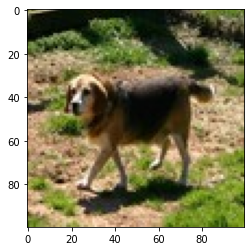

In [6]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Used as a loss function for binary classification model

In [9]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 10s 264ms/step - loss: 0.7196 - accuracy: 0.5140
Epoch 2/5
32/32 [==============================] - 8s 245ms/step - loss: 0.6764 - accuracy: 0.5760
Epoch 3/5
32/32 [==============================] - 8s 250ms/step - loss: 0.6341 - accuracy: 0.6540
Epoch 4/5
32/32 [==============================] - 8s 255ms/step - loss: 0.5811 - accuracy: 0.6925
Epoch 5/5
32/32 [==============================] - 9s 267ms/step - loss: 0.5135 - accuracy: 0.7465


In [10]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 35ms/step - loss: 0.5814 - accuracy: 0.7025


[0.581430196762085, 0.7024999856948853]

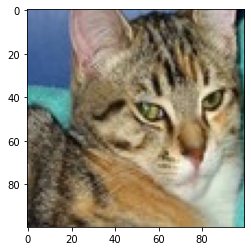

1/1 [==============================] - 0s 97ms/step
Our model dog


In [11]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
Y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
Y_pred=Y_pred>0.5

if(Y_pred == 0):
    pred='dog'
else:
    pred='cat'
print("Our model says it is a ",pred)